In [177]:
import numpy as np
import matplotlib.pyplot as plt

In [178]:
def distance(x):
    x = np.array(x)
    dist = []
    for i in range(x.shape[0]):
        dist.append([])
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            if (i != j) :
                dist[i].append(abs(x[i] - x[j]).sum())
    dist = np.array(dist)
    mini = []
    for i in range(x.shape[0]):
        mini.append(dist[i].sum())
    mini = np.array(mini)
    m = min(mini)
    for i in range(x.shape[0]):
        if(mini[i] == m):
            ind = i
    return ind
    

In [179]:
#b = [array([ 1.5,  1.8]), array([ 5.,  8.]), array([ 8.,  8.]), array([  9.,  11.])]
b = np.array([[1.5,1.8],[5,8],[8,8],[9,11]])
b
b = distance(b)
print(b)
#b[0].sum()

2


In [180]:
 def fit(data,k = 2,max_iter = 1000):
        medoids = []
        for i in range(k):
            medoids.append(data[i])
        #print(medoids)
        labels = []
        for it in range(max_iter):
            cluster_points = []
            for i in range(k):
                cluster_points.append([])
            #print(cluster_points)
            for point in data:
                distances = [abs(point - m).sum() for m in medoids]
                min_distance = min(distances)
                classification = distances.index(min_distance)
                cluster_points[classification].append(point)
            #print(cluster_points)
            change = False
            for i in range(k):
                new_medoids = []
                #print('wwwwwwwwwwwwwww')
                #print(cluster_points[i])
                ind = distance(cluster_points[i])
                #print('qqqqqqqqq')
                #print(cluster_points[i][ind])
                new_medoids.append(cluster_points[i][ind])
                if not np.array_equal(medoids[i], new_medoids) :
                    change = True
                medoids[i] = new_medoids
            if not change:
                break
        labels = predict(data,medoids)
        return labels,medoids
    
def predict(test_data,medoids):
        cluster_pred = []
        for point in test_data:
            distances = [(abs(point - m)).sum() for m in medoids]
            min_distance = min(distances)
            classification = distances.index(min_distance)
            cluster_pred.append(classification)
        return cluster_pred

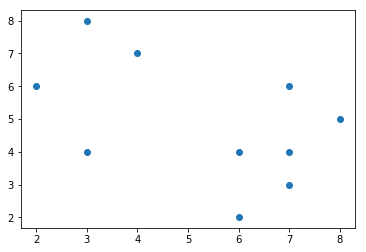

In [181]:
X = np.array([[2,6],[3,4],[3,8],[4,7],[6,2],[6,4],[7,3],[7,4],[8,5],[7,6]])
plt.scatter(X[:,0], X[:,1])
plt.show()

In [184]:
r = fit(X)
print(r)

([0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [[array([4, 7])], [array([7, 4])]])


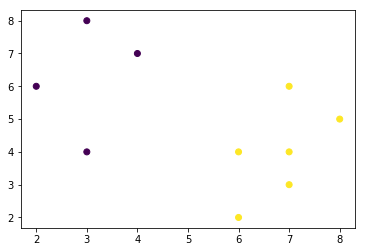

In [183]:
plt.scatter(X[:,0], X[:,1], c=fit(X)[0])
#plt.scatter([1,2],[8,8])
plt.show()